数据独立性判断

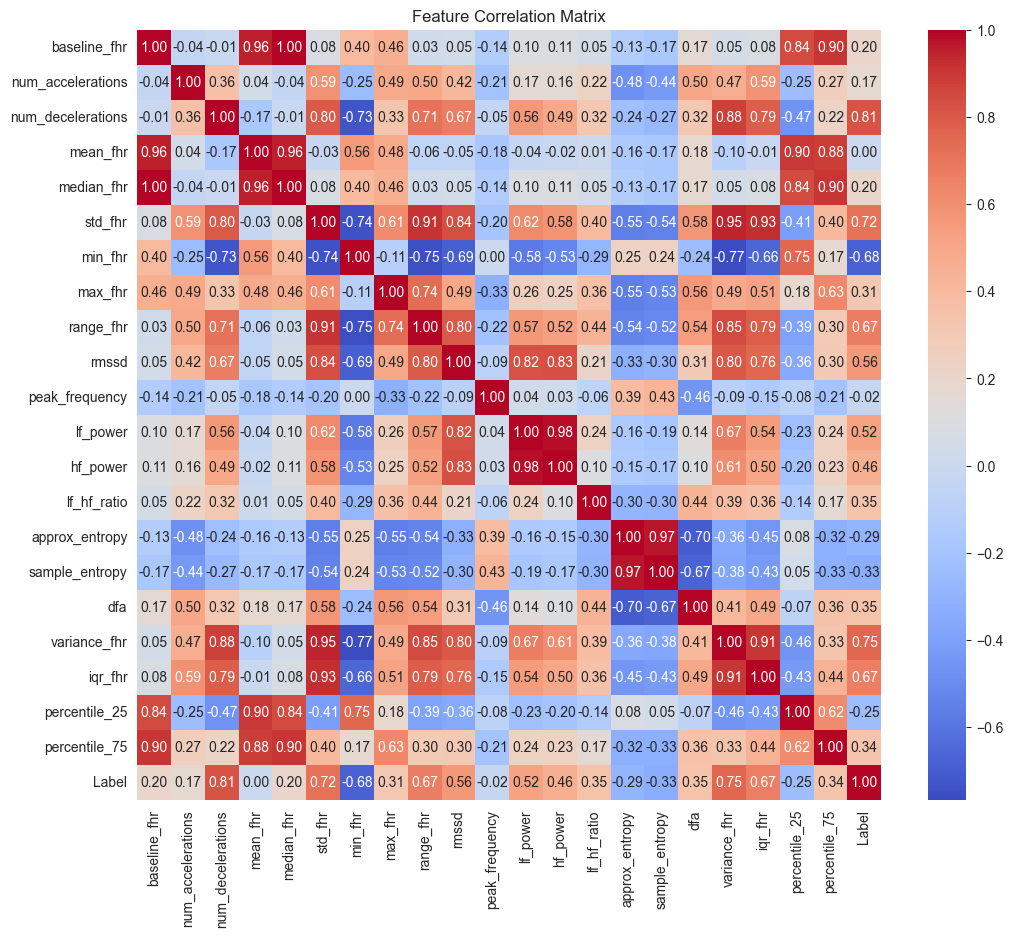

In [1]:
# Re-import necessary libraries after reset and load the data again
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data again
file_path = './Training_Data.xlsx'
data_df = pd.read_excel(file_path, sheet_name='Sheet1')

# Compute the correlation matrix to assess independence
correlation_matrix = data_df.corr()

# Plotting correlation matrix to visualize feature independence clearly
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
file_path = './Training_Data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Separate features and label
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [4]:
# Create LDA pipeline
lda_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LDA()
)
# Train LDA model
lda_pipeline.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

In [5]:
# Cross-validation accuracy
cv_scores = cross_val_score(lda_pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy (5 folds):", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation accuracy (5 folds): [0.94594595 0.97297297 0.97297297 0.97297297 1.        ]
Mean CV accuracy: 0.972972972972973


In [6]:
# Make predictions on validation set
y_pred = lda_pipeline.predict(X_val)
y_prob = lda_pipeline.predict_proba(X_val)[:, 1]


Validation accuracy: 1.0

Confusion matrix:
 [[68  0]
 [ 0  6]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00         6

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74


ROC-AUC Score: 1.0


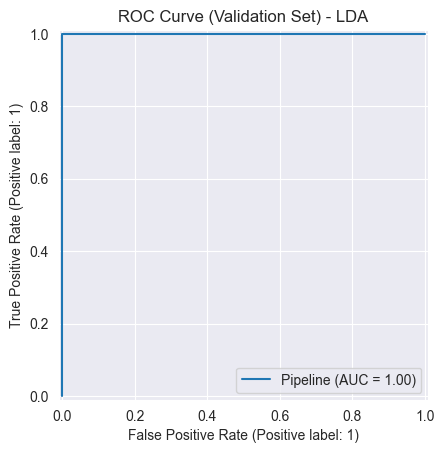

In [7]:
# Evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
print("\nValidation accuracy:", accuracy)

conf_matrix = confusion_matrix(y_val, y_pred)
print("\nConfusion matrix:\n", conf_matrix)

class_report = classification_report(y_val, y_pred)
print("\nClassification report:\n", class_report)

auc = roc_auc_score(y_val, y_prob)
print("\nROC-AUC Score:", auc)

# ROC Curve Visualization
RocCurveDisplay.from_estimator(lda_pipeline, X_val, y_val)
plt.title("ROC Curve (Validation Set) - LDA")
plt.show()


In [8]:
x_test_group_1 = pd.read_excel("./Test_Data.xlsx", sheet_name="Group-1", header=0)
x_test_group_2 = pd.read_excel("./Test_Data.xlsx", sheet_name="Group-2", header=0)
x_test_group_3 = pd.read_excel("./Test_Data.xlsx", sheet_name="Group-3", header=0)
x_test_group_4 = pd.read_excel("./Test_Data.xlsx", sheet_name="Group-4", header=0)

In [9]:
prediction_group_1 = lda_pipeline.predict(x_test_group_1)
pd.DataFrame(prediction_group_1).to_excel("./LDA-PG1.xlsx", index=False)

In [10]:
prediction_group_2 = lda_pipeline.predict(x_test_group_2)
pd.DataFrame(prediction_group_1).to_excel("./LDA-PG2.xlsx", index=False)

In [11]:
prediction_group_3 = lda_pipeline.predict(x_test_group_3)
pd.DataFrame(prediction_group_3).to_excel("./LDA-PG3.xlsx", index=False)

In [12]:
prediction_group_4 = lda_pipeline.predict(x_test_group_4)
pd.DataFrame(prediction_group_4).to_excel("./LDA-PG4.xlsx", index=False)